In [1]:
import h5py
import os.path

def save_file(folder,name,data,xaxis,yaxis):
    path = folder + '/' + name
    if not os.path.exists(path):
        with h5py.File(path, 'w') as f:
            f.create_dataset('data', data = data)
            f.create_dataset('X_'+xaxis, data = 0)
            f.create_dataset('Y_'+yaxis, data = 0)
            f.close()
            print('The file has been saved')
    else:
        print('The file already exists')
    return None

def rewrite_file(folder,name,data,xaxis,yaxis):
    path = folder + '/' + name
    if os.path.exists(path):
        with h5py.File(path, 'w') as f:
            f.create_dataset('data', data = data)
            f.create_dataset('X_'+xaxis, data = 0)
            f.create_dataset('Y_'+yaxis, data = 0)
            f.close()
            print('The file has been rewrited')
    else:
        print('The file does not exist')
    return None

def read_file(folder,name):
    path = folder + '/' + name
    with h5py.File(path, 'r') as f:
        data = f['data'][:]
        print(f.keys())
        f.close()
    print('Data shape =',data.shape)
    return data

In [2]:
import numpy as np
import torch

In [3]:
A = torch.tensor(np.arange(10).reshape(2,5))

In [4]:
import datetime

datetime.datetime.now()

datetime.datetime(2022, 1, 18, 15, 44, 44, 425413)

In [5]:
text = 'sadsda cdscdcsd 5545 fsdfsf'
path = 'Q'
with h5py.File(path, 'w') as f:
    f.create_dataset('data', data = A)
    f.create_dataset('data1', data = A)
    f.create_dataset('description', data = text)

In [6]:
with h5py.File(path, 'r') as f:
    print(f.keys())
    data = f['description'][:]
data

<KeysViewHDF5 ['data', 'data1', 'description']>


ValueError: Illegal slicing argument for scalar dataspace

In [ ]:
data

In [ ]:
import torch
import torch.nn as nn

class function(torch.nn.Module):
    def __init__(self,th=None):
        super(function, self).__init__()
        self.th = th
        
    def forward(self, x):
        return x * self.th

    def extra_repr(self):
        return 'opt_th={}'.format(self.th)
    
system = nn.Sequential()
inp  = 2
n = 3
for i in range(0,n):
    # find optimal threshold
    th = system.forward(inp)
    # add this layer into model
    system.add_module('layer_'+str(i),function(th))
    
system.named_modules, system.forward(3)

In [ ]:
class Computer():
    def __init__(self, computer, ram, ssd):
        self.computer = computer
        self.ram = ram
        self.ssd = ssd

# Если создать дочерний класс `Laptop`, то будет доступ 
# к свойству базового класса благодаря функции super().
class Laptop(Computer):
    def __init__(self, computer, ram, ssd, model):
        super(Laptop).__init__()
        self.model = model


In [ ]:
lap1 = Computer('lenovo',512,256)

In [ ]:
lap1.computer

In [ ]:
lap2 = Laptop('lenovo',512,256,'ssw')

In [ ]:
lap2.model

In [ ]:
lap2.m

In [ ]:
mod_list = ['QPSK','QAM16','QAM64', 'QAM256']
mod_alloc = ['QAM64', 'QPSK', 'QAM16', 'QAM256', 'QPSK','QPSK', 'QAM16', 'QAM256']

idxs = []
for item in mod_alloc:
    idx = np.argmax(np.array(mod_list) == item)
    idxs.append(idx)
    
    
one_hot = np.zeros([len(mod_list),len(mod_alloc)])
for i,idx in enumerate(idxs):
    one_hot[idx,i] = 1
    
one_hot

In [ ]:
one_hot_wei = np.zeros([4,4])
counter = np.zeros(4)
for item in mod_alloc:
    idx = np.argmax(np.array(mod_list) == item)
    counter[idx] += 1
counter

In [ ]:
np.eye(4) @  counter

Populating the interactive namespace from numpy and matplotlib


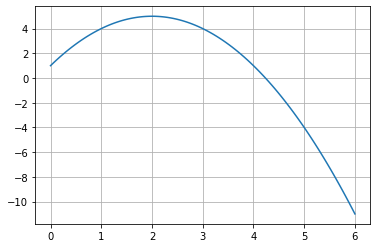

In [156]:
%pylab inline

def PAPR(x):
    return -(x - 2)**2 + 5

bnd = np.array([0,6])

ths = np.linspace(bnd[0],bnd[1],100)
plt.plot(ths,PAPR(x))
plt.grid()

In [163]:
bnd = np.array([0,6])

for i in range(25):
    # find midddle point
    mid_point = (bnd[0] + bnd[-1])/2
    # and result in this point
    mid_res = PAPR(mid_point)
    # find edge results
    e1 = PAPR(bnd[0])
    e2 = PAPR(bnd[1])
    edg_res = [e1,e2]
    # find lowest element
    idx_del = np.array([edg_res[0],edg_res[1],mid_res]).argmin()
    # delete corresponding bound
    bnd = np.delete(np.array([bnd[0],bnd[-1],mid_point]),idx_del)
bnd

array([1.99999988, 2.00000006])

In [152]:
1/2**25

2.9802322387695312e-08

In [161]:
PAPR(bnd[0])

4.999999999999986